In [1]:
import os
import pandas as pd
import numpy as np
from pandas.tseries import offsets
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
PATH_FOLDER = os.path.join(os.getcwd(), r"C:\Users\Lenovo\Desktop\Master Data Science - Nuclio Digital School\Projects\TimeSeries\Data")

merged = os.path.join(PATH_FOLDER, 'full_df.csv')

full_df = pd.read_csv(merged)
full_df['date'] = pd.to_datetime(full_df['date'])
full_df

,Unnamed: 0,date,item_store,Monthly_Sales,Monthly_Revenue,Monthly_Transactions,Monthly_Days_Sales,1_region,2_store,3_sub_store,4_category,5_item
0,0,2011-01-31,ACCESORIES_1_001_BOS_1,0.0,0.0,0.0,0.0,Boston,South_End,BOS_1,ACCESORIES,ACCESORIES_1
1,1,2011-01-31,ACCESORIES_1_001_BOS_2,0.0,0.0,0.0,0.0,Boston,Roxbury,BOS_2,ACCESORIES,ACCESORIES_1
2,2,2011-01-31,ACCESORIES_1_001_BOS_3,0.0,0.0,0.0,0.0,Boston,Back_Bay,BOS_3,ACCESORIES,ACCESORIES_1
3,3,2011-01-31,ACCESORIES_1_001_NYC_1,0.0,0.0,0.0,0.0,New York,Greenwich_Village,NYC_1,ACCESORIES,ACCESORIES_1
4,4,2011-01-31,ACCESORIES_1_001_NYC_2,0.0,0.0,0.0,0.0,New York,Harlem,NYC_2,ACCESORIES,ACCESORIES_1
...,...,...,...,...,...,...,...,...,...,...,...,...
1951227,1951227,2016-04-30,SUPERMARKET_3_827_NYC_3,0.0,0.0,0.0,0.0,New York,Tribeca,NYC_3,SUPERMARKET,SUPERMARKET_3
1951228,1951228,2016-04-30,SUPERMARKET_3_827_NYC_4,0.0,0.0,0.0,0.0,New York,Brooklyn,NYC_4,SUPERMARKET,SUPERMARKET_3
1951229,1951229,2016-04-30,SUPERMARKET_3_827_PHI_1,1.0,1.2,1.0,1.0,Philadelphia,Midtown_Village,PHI_1,SUPERMARKET,SUPERMARKET_3
1951230,1951230,2016-04-30,SUPERMARKET_3_827_PHI_2,0.0,0.0,0.0,0.0,Philadelphia,Yorktown,PHI_2,SUPERMARKET,SUPERMARKET_3


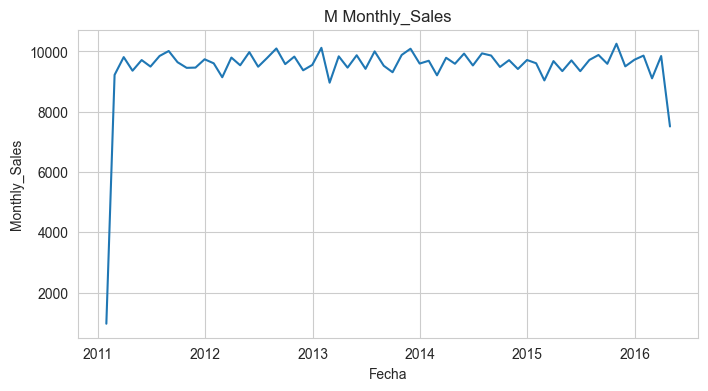

In [6]:
def plot_sales_by_granularity(df, datetime, variable):
    """
    Función que toma un dataframe con una columna de fecha, un objeto datetime y una variable
    y grafica los datos agrupados por la granularidad dada.
    """
    # Agrupar por la granularidad dada y sumar la variable
    data = df.set_index("date").resample(datetime)[variable].sum().reset_index()

    # Graficar los datos usando Seaborn
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.lineplot(x="date", y=variable, data=data)
    ax.set_title(datetime + ' ' + variable)
    ax.set_xlabel('Fecha')
    ax.set_ylabel(variable)
    plt.show()

plot_sales_by_granularity(full_df, 'M', 'Monthly_Sales')

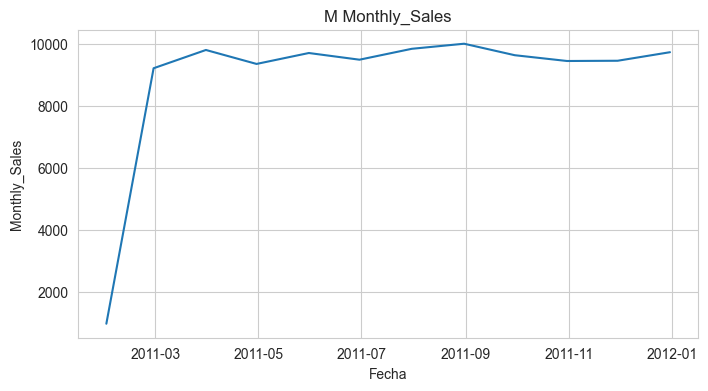

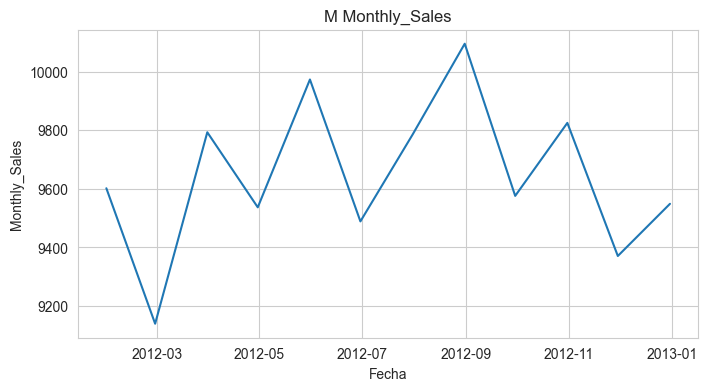

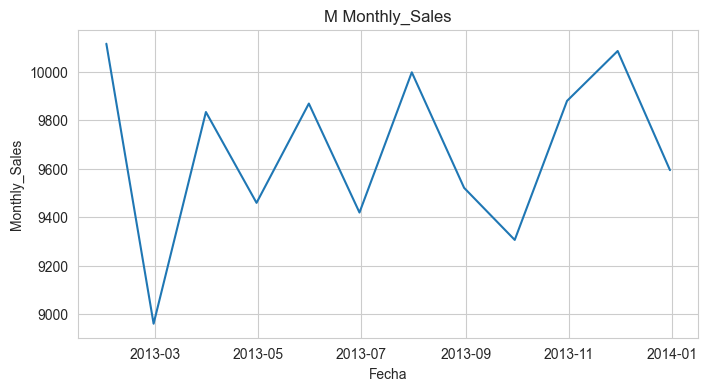

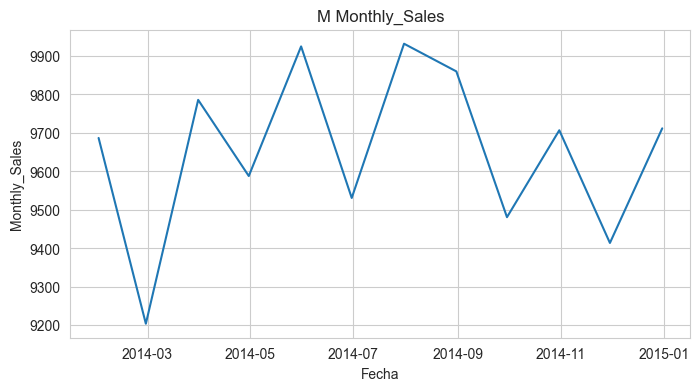

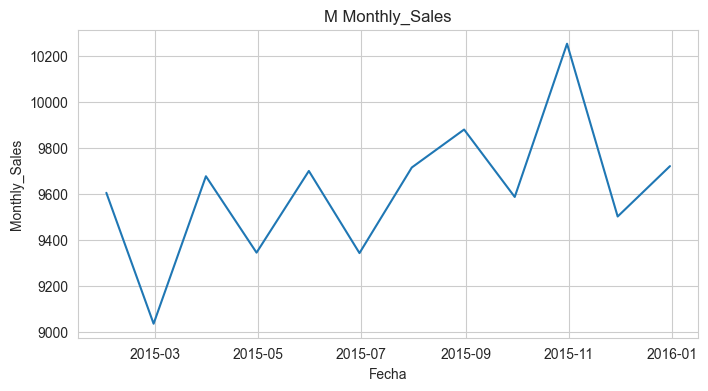

In [7]:
def plot_sales_by_granularity(df, frequency, variable):
    """
    Función que toma un dataframe con una columna de fecha, una frecuencia y una variable
    y grafica los datos agrupados por la granularidad dada.
    """
    # Agrupar por la granularidad dada y sumar la variable
    data = df.set_index("date").resample(frequency)[variable].sum().reset_index()

    # Graficar los datos usando Seaborn
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.lineplot(x="date", y=variable, data=data)
    ax.set_title(frequency + ' ' + variable)
    ax.set_xlabel('Fecha')
    ax.set_ylabel(variable)
    plt.show()

def plot_sales_by_year_segments(df, date_column, variable, years):
    """
    Función que genera gráficos de ventas para cada tramo de año.
    """
    # Obtener el rango de años
    min_year = df[date_column].dt.year.min()
    max_year = df[date_column].dt.year.max()
    
    # Calcular el número de años por tramo
    years_per_segment = (max_year - min_year + 1) // years
    
    # Generar gráficos para cada tramo de año
    for i in range(years):
        start_year = min_year + (i * years_per_segment)
        end_year = start_year + years_per_segment - 1
        segment_label = f'{start_year}-{end_year}'
        
        # Filtrar los datos por el rango de años actual
        segment_data = df[(df[date_column].dt.year >= start_year) & (df[date_column].dt.year <= end_year)]
        
        # Generar el gráfico para el tramo de año actual
        plot_sales_by_granularity(segment_data, 'M', variable)  # 'A' para anual

# Llamar a la función plot_sales_by_year_segments con el nombre correcto de la columna de fecha
plot_sales_by_year_segments(full_df, 'date', 'Monthly_Sales', 5)

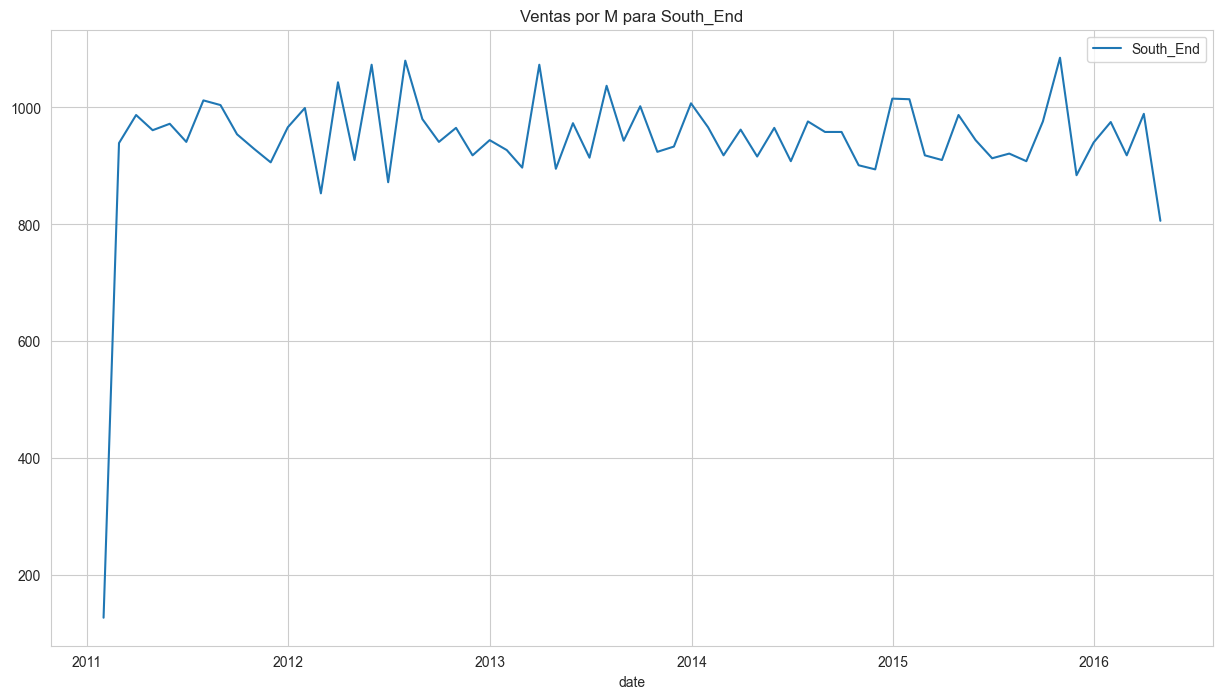

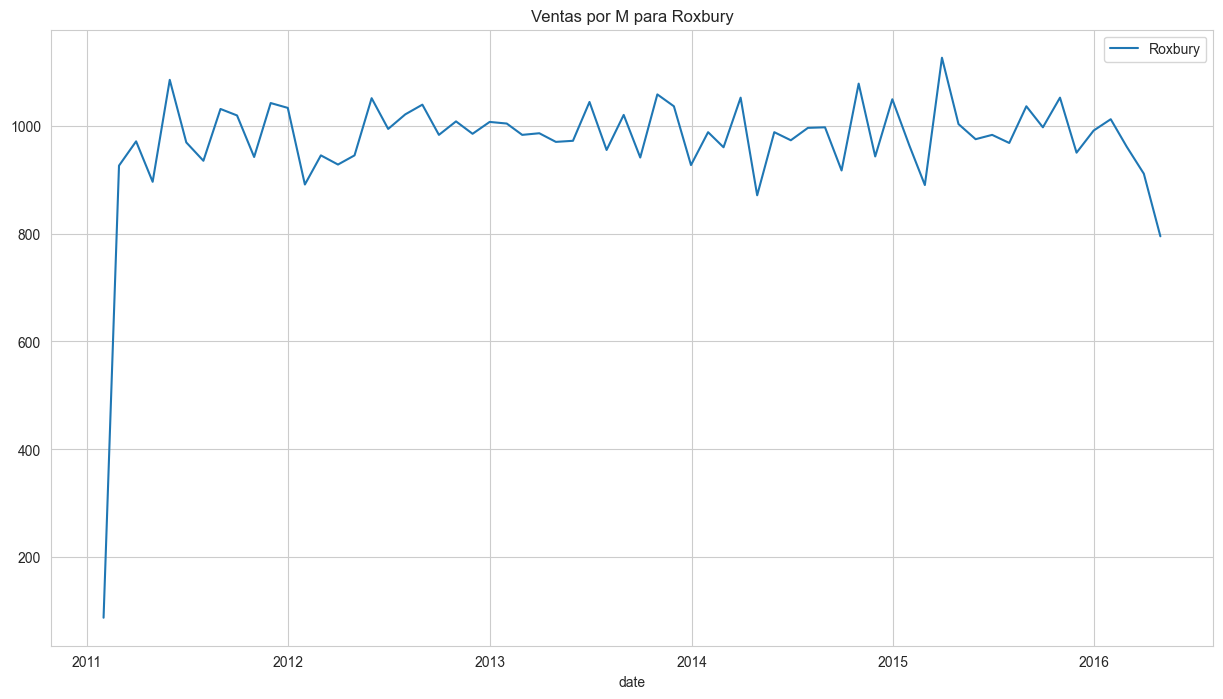

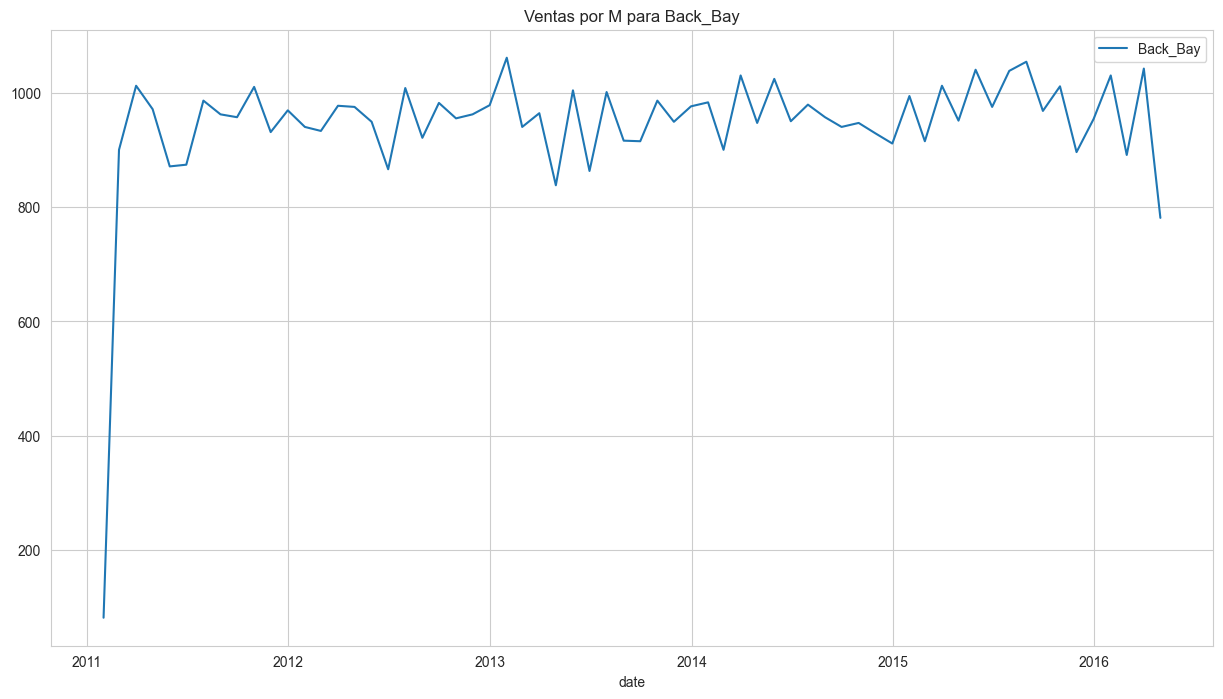

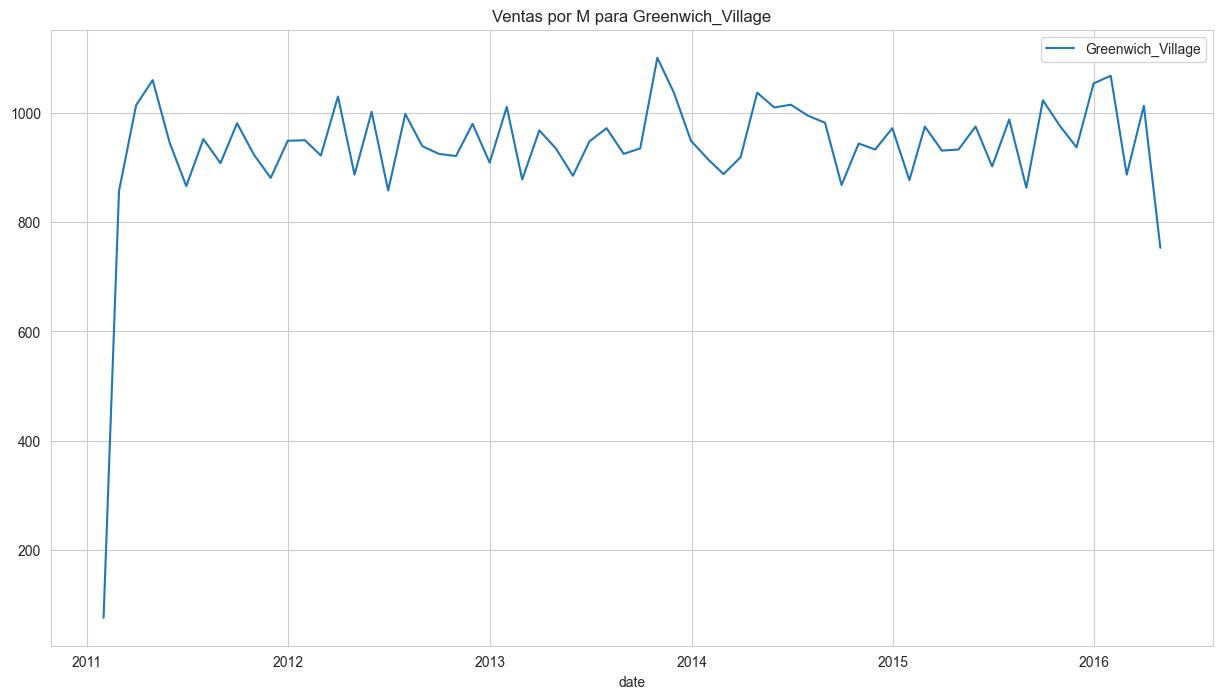

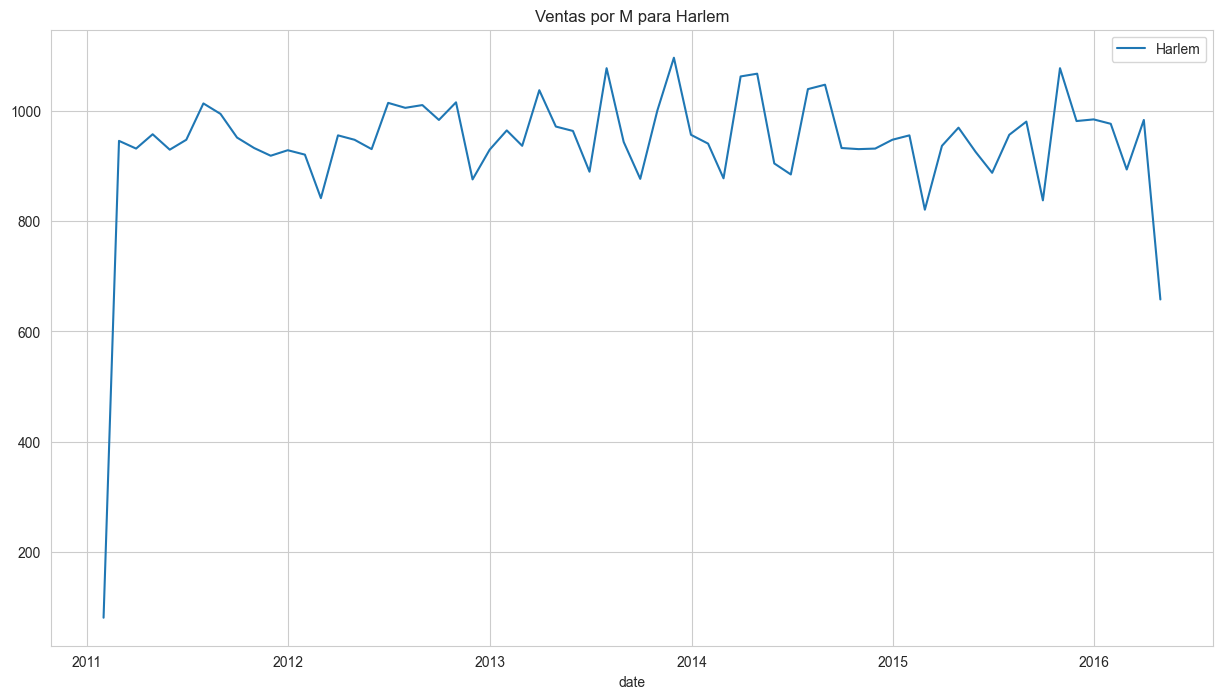

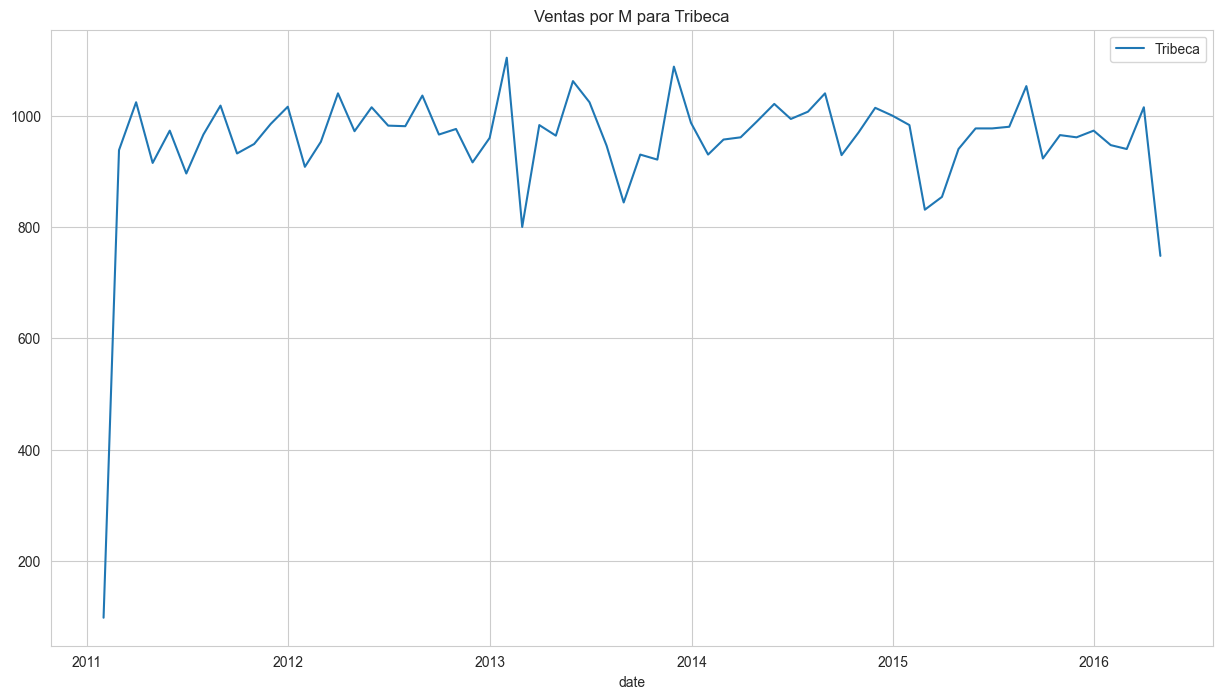

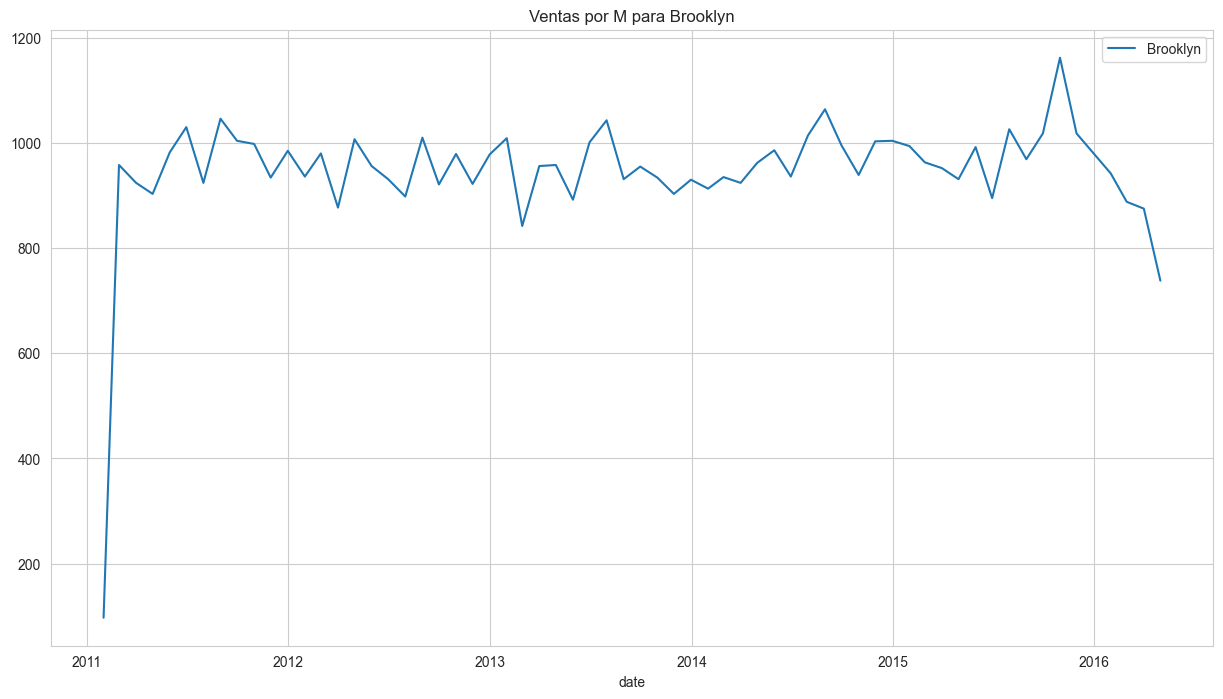

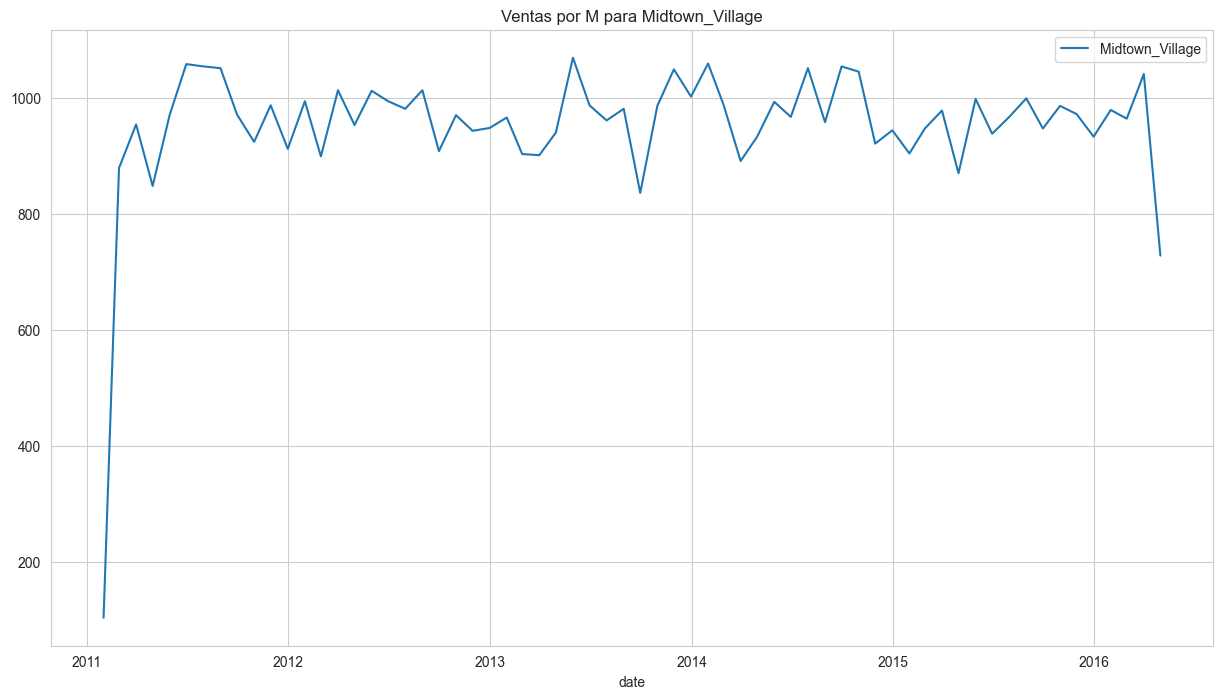

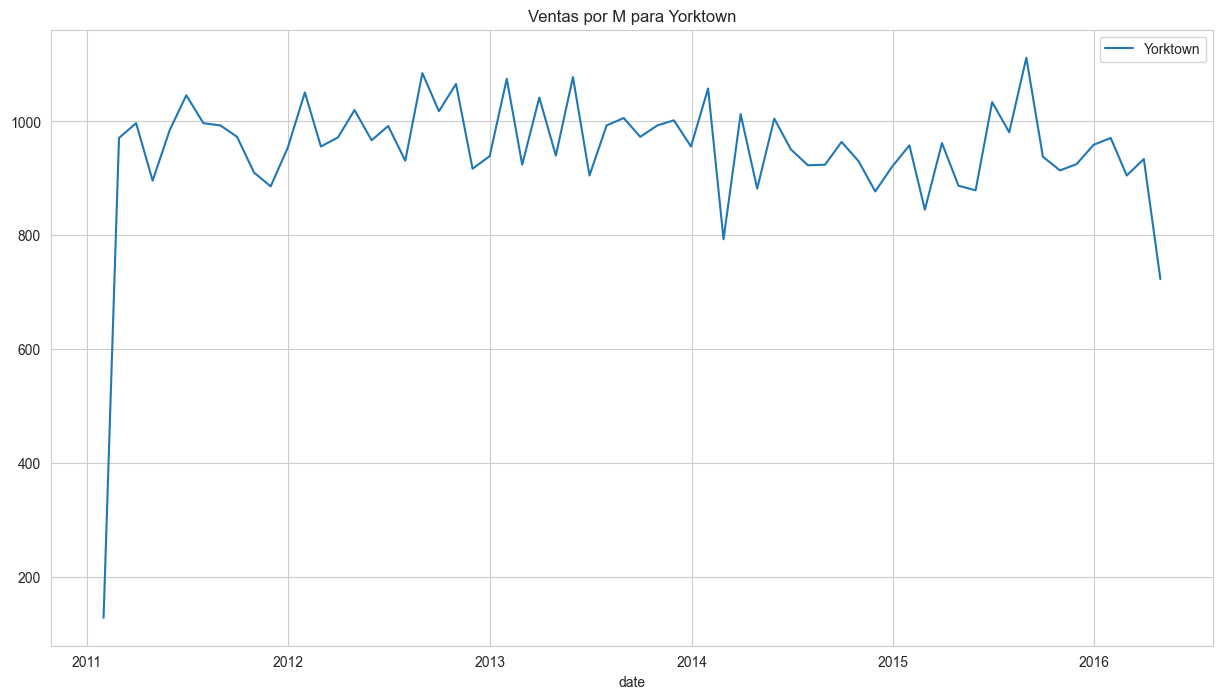

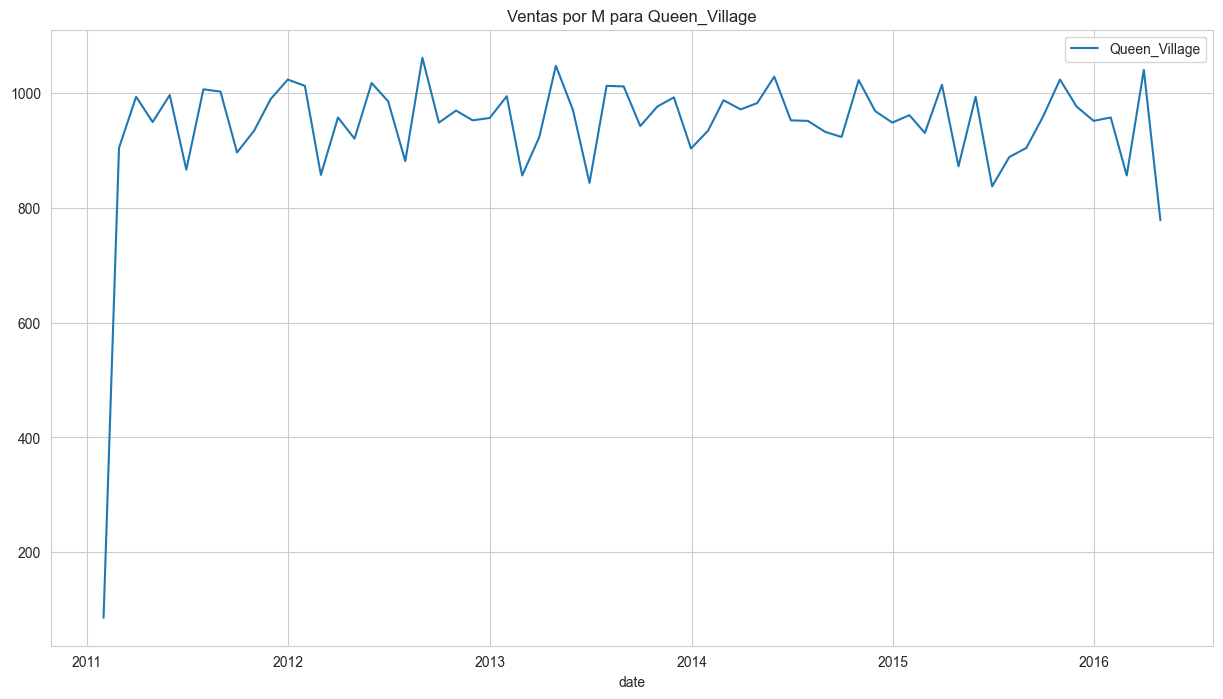

In [8]:
def plot_sales_by_category_and_date(df, date_col, category_col, sales_col, freq='D'):
    """
    Esta función toma como argumentos un DataFrame, el nombre de la columna de fecha,
    el nombre de la columna de la categoría a agrupar, el nombre de la columna de ventas
    y la frecuencia a la que se desea agrupar los datos (por día, semana o mes).
    Devuelve un gráfico de líneas de seaborn con las ventas por fecha para cada categoría.
    """
    # Obtener las categorías únicas
    categories = df[category_col].unique()

    # Para cada categoría, crear un gráfico de líneas separado
    for category in categories:
        # Obtener los datos para la categoría actual
        data = df[df[category_col] == category]

        # Agrupar los datos por fecha y sumar las ventas
        sales_by_date = data.groupby(pd.Grouper(key=date_col, freq=freq))[sales_col].sum()

        # Crear el gráfico de líneas
        plt.figure(figsize=(15, 8))
        sns.lineplot(x=sales_by_date.index, y=sales_by_date.values, label=category)

        # Añadir título y leyenda
        plt.title(f"Ventas por {freq} para {category}")
        plt.legend()

        # Mostrar el gráfico
        plt.show()

plot_sales_by_category_and_date(full_df, 'date', '2_store', 'Monthly_Sales', freq='M')

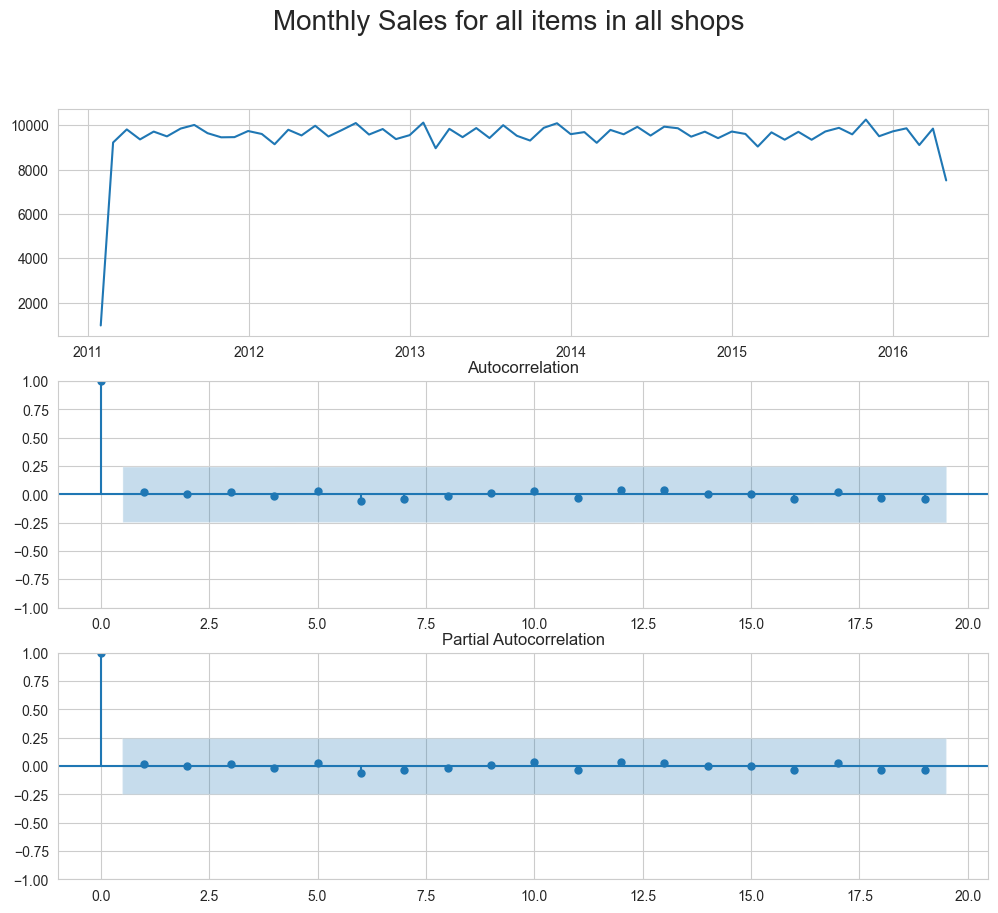

In [9]:
def plot_ts_acf_pacf(y, title):
    '''
    Plots the ts you pass and the acf and pacf.
    '''
    fig = plt.figure(figsize = (12, 10))
    ax1, ax2, ax3 = fig.subplots(3, 1)

    ax1.plot(y)
    plot_acf(x = y, ax = ax2)
    plot_pacf(x = y, ax = ax3)

    plt.suptitle(t = title, fontsize = 20)

y = full_df.set_index("date").resample("M")["Monthly_Sales"].sum()

plot_ts_acf_pacf(y = y, title = "Monthly Sales for all items in all shops");

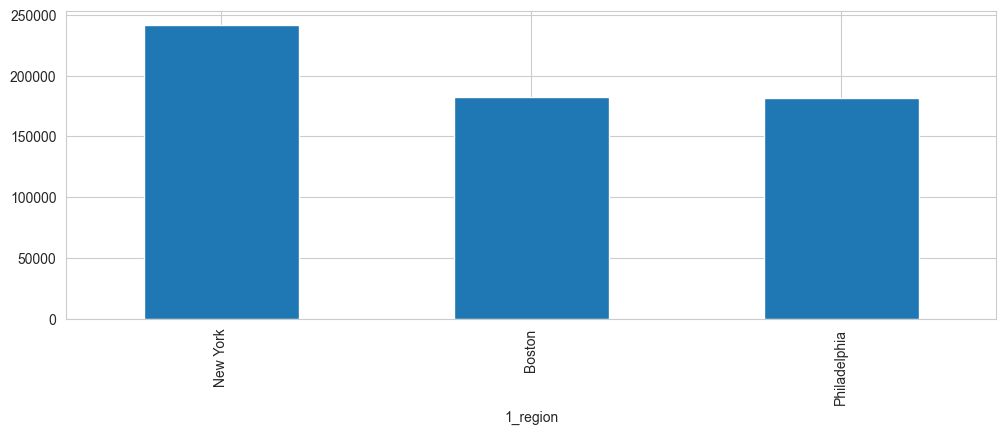

In [10]:
full_df.groupby(["1_region"])["Monthly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar", figsize = (12, 4));

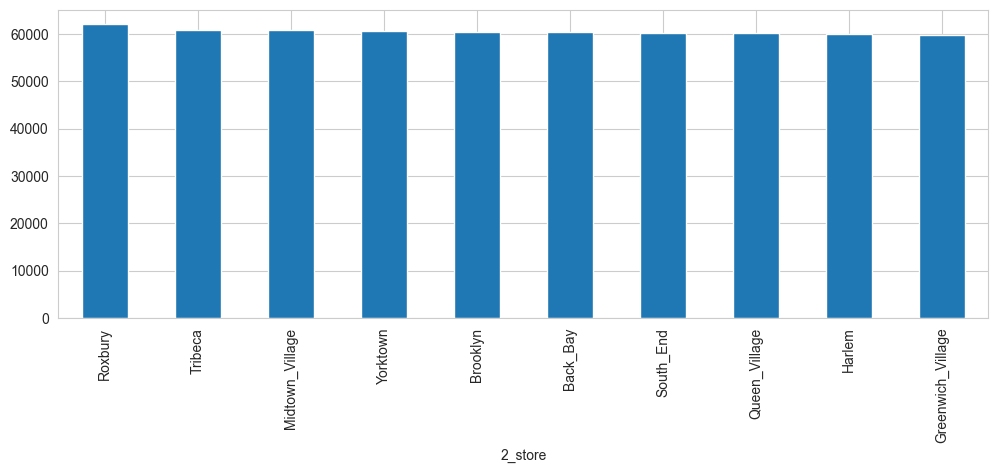

In [12]:
full_df.groupby(["2_store"])["Monthly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar", figsize = (12, 4));

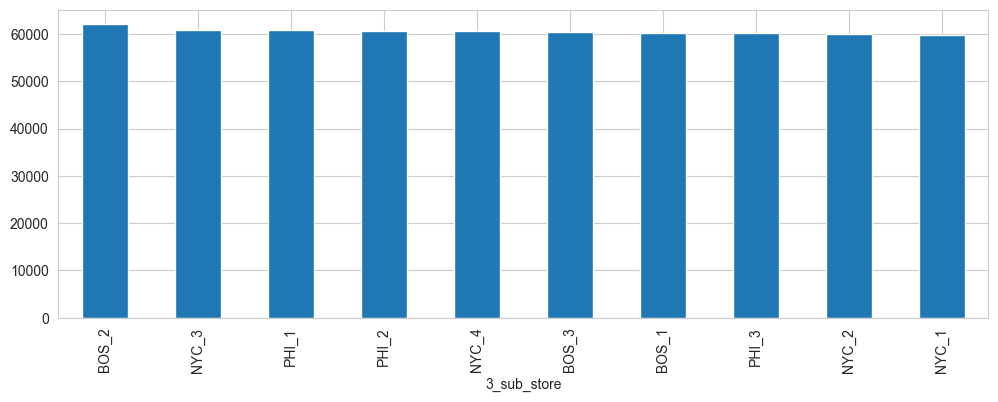

In [13]:
full_df.groupby(["3_sub_store"])["Monthly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar", figsize = (12, 4));

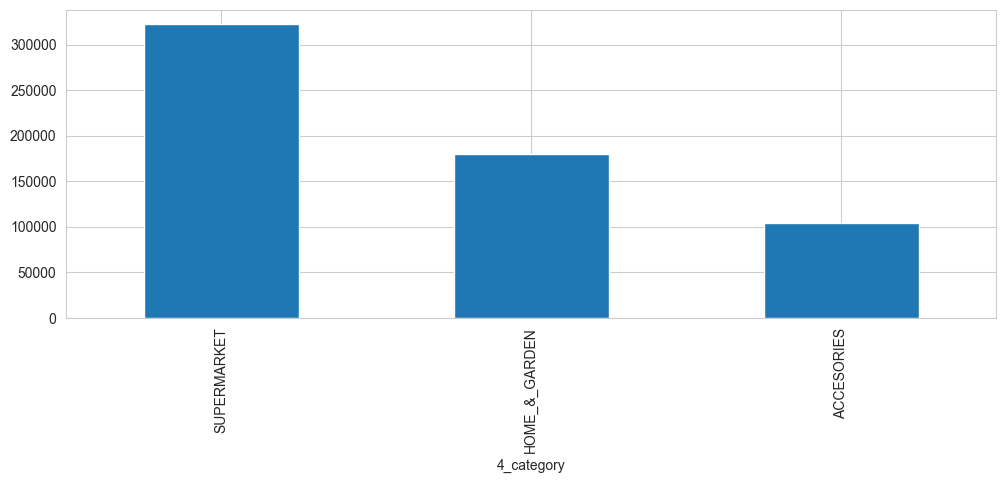

In [14]:
full_df.groupby(["4_category"])["Monthly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar", figsize = (12, 4));

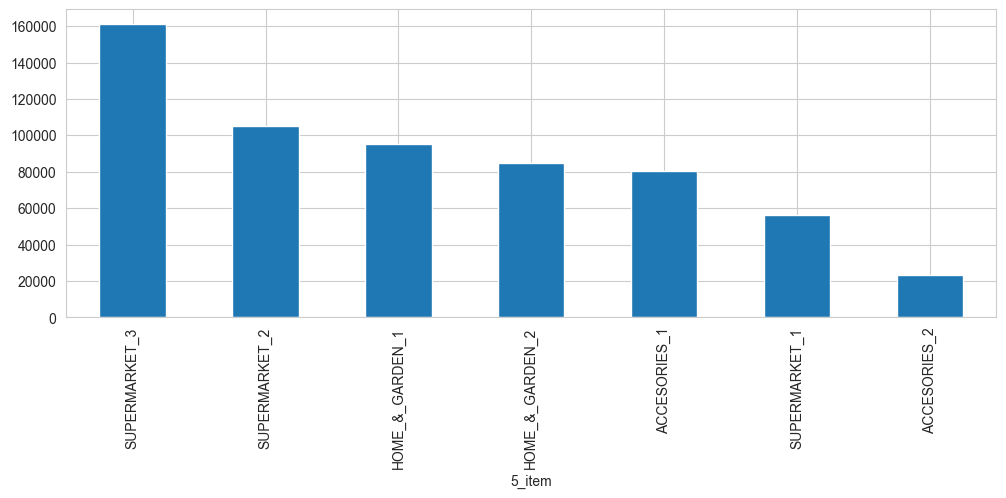

In [15]:
full_df.groupby(["5_item"])["Monthly_Sales"].sum().sort_values(ascending = False).plot(kind = "bar", figsize = (12, 4));